## Importing Libraries

In [21]:
import numpy as np
import math
import matplotlib.pyplot as plt
import tqdm
import matplotlib.image as Image
import random


## Helper Functions

In [22]:
def imageToArray(image):
    img=Image.imread(image)
    img=img.reshape(-1,)
    return img

def arrayToImage(array,l,b,h):
    newimg=array.reshape(l,b,h)
    return newimg

def moduloInverse(a,m):
    for i in range(1,m):
        if (a*i)%m==1:
            return i

def isPrime(n):
    if n==2:
        return True
    if n%2==0:
        return False
    for i in range(3,int(math.sqrt(n))+1,2):
        if n%i==0:
            return False
    return True

def power(a,b,m):
    ind=1
    for i in range(0,b):
        ind=(ind*a)%m
    return ind


## Prime Number Generator

In [23]:
def primeNumberGenerator():
    primeslist=[]
    for i in range(2,100):
        if isPrime(i):
            primeslist.append(i)
    p=1
    q=1
    while p*q<256:
        p=random.choice(primeslist)
        q=random.choice(primeslist)
    return p,q

## Key Generation

In [24]:
def keyGeneration(p,q):
    phi=(p-1)*(q-1)
    e=random.randint(2,phi)
    while math.gcd(e,phi)!=1:
        e=random.randint(2,phi)
    d=moduloInverse(e,phi)
    return e,d

## RSA Encryption

In [25]:

def encrypt(plainText,e,n):
    cipherText=[]
    for i in tqdm.tqdm(plainText):
        cipherText.append(power(i,e,n))
    return cipherText

## RSA Decryption

In [26]:
def decrypt(cipherText,d,n):
    plainText=[]
    for i in tqdm.tqdm(cipherText):
        plainText.append(power(i,d,n))
    return plainText


## Actual Image


(194, 259, 3)
[[[151 181 207]
  [150 180 206]
  [148 178 206]
  ...
  [120 141 170]
  [124 140 165]
  [125 141 166]]

 [[151 178 205]
  [149 179 205]
  [150 177 206]
  ...
  [123 140 156]
  [128 141 150]
  [128 141 150]]

 [[150 176 203]
  [150 177 204]
  [151 177 204]
  ...
  [131 142 128]
  [137 142 122]
  [137 142 122]]

 ...

 [[ 41  30  28]
  [ 38  28  26]
  [ 34  26  24]
  ...
  [ 50  49  45]
  [ 50  49  44]
  [ 52  49  44]]

 [[ 42  32  31]
  [ 37  29  27]
  [ 30  21  22]
  ...
  [ 50  46  43]
  [ 50  46  43]
  [ 52  47  44]]

 [[ 41  33  31]
  [ 37  29  27]
  [ 28  22  22]
  ...
  [ 51  46  43]
  [ 51  46  43]
  [ 52  47  44]]]


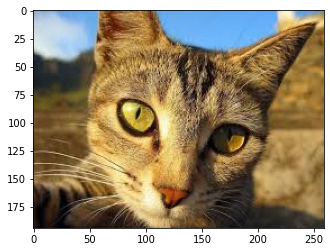

In [27]:
img=Image.imread('cat.jpeg')
print(img.shape)
print(img)
plt.imshow(img)

## Main

In [28]:
p,q=primeNumberGenerator()
n=p*q
e,d=keyGeneration(p,q)
print ("The public key is: ",e,n)
print ("The private key is: ",d,n)
imagePath='cat.jpeg'
image3D=Image.imread(imagePath)
l=image3D.shape[0]
b=image3D.shape[1]
h=image3D.shape[2]
intialImageVector=imageToArray(imagePath)
print ("The image in 1D is: ", intialImageVector)
cipherText=encrypt(intialImageVector,e,n)
garbageimage=cipherText
print ("The ciphertext is: ", cipherText)
plainText=decrypt(cipherText,d,n)
print ("The plaintext is: ", plainText)
plainText=np.array(plainText)
finalImage=arrayToImage(plainText,l,b,h)
for i in range(0,len(garbageimage)):
    garbageimage[i]=garbageimage[i]%256
garbageimage=np.array(garbageimage)
garbageImage=arrayToImage(garbageimage,l,b,h)



The public key is:  415 3827
The private key is:  1327 3827
The image in 1D is:  [151 181 207 ...  52  47  44]


100%|██████████| 150738/150738 [00:18<00:00, 8329.91it/s]


The ciphertext is:  [290, 658, 1999, 2333, 968, 159, 506, 178, 159, 2809, 1435, 2588, 2081, 3350, 2899, 3164, 1720, 2606, 977, 1509, 1851, 99, 1356, 1878, 1807, 933, 935, 3135, 2644, 3822, 966, 122, 53, 704, 37, 955, 704, 2865, 2606, 2411, 1356, 2952, 1081, 1509, 2899, 781, 1509, 1999, 781, 1356, 1657, 1081, 1356, 344, 1081, 1356, 3651, 1807, 2865, 344, 2061, 2644, 344, 3808, 3507, 414, 3364, 776, 1541, 3517, 1729, 1999, 3517, 776, 993, 3438, 3640, 344, 1229, 3507, 3651, 2611, 94, 2252, 2611, 1646, 437, 1217, 2644, 1699, 2000, 2644, 13, 1217, 933, 13, 3438, 37, 799, 3517, 122, 799, 3517, 122, 799, 3517, 122, 799, 3517, 122, 799, 3517, 122, 799, 3517, 122, 1436, 3517, 122, 1436, 3517, 122, 1436, 3517, 122, 1436, 3438, 37, 1436, 3438, 37, 1436, 1565, 122, 359, 1565, 122, 359, 1565, 122, 359, 1090, 2644, 799, 3497, 1356, 1436, 3517, 1356, 277, 2634, 1356, 2067, 2634, 2865, 1493, 3497, 3093, 1061, 1090, 3093, 3802, 3475, 1509, 1027, 3497, 1356, 359, 630, 94, 2067, 966, 2566, 2336, 1509, 37

100%|██████████| 150738/150738 [00:37<00:00, 3978.19it/s]


The plaintext is:  [151, 181, 207, 150, 180, 206, 148, 178, 206, 146, 176, 204, 144, 174, 202, 142, 172, 200, 139, 170, 199, 138, 169, 198, 130, 163, 194, 131, 164, 195, 132, 165, 196, 133, 166, 197, 133, 168, 200, 134, 169, 201, 135, 170, 202, 136, 170, 207, 136, 169, 212, 135, 169, 215, 135, 169, 217, 130, 168, 215, 124, 164, 215, 117, 160, 211, 110, 156, 208, 104, 154, 207, 104, 156, 213, 102, 158, 215, 99, 160, 217, 96, 161, 219, 96, 162, 222, 95, 164, 223, 94, 164, 224, 95, 163, 224, 102, 166, 228, 104, 165, 228, 104, 165, 228, 104, 165, 228, 104, 165, 228, 104, 165, 228, 104, 165, 230, 104, 165, 230, 104, 165, 230, 104, 165, 230, 102, 166, 230, 102, 166, 230, 101, 165, 229, 101, 165, 229, 101, 165, 229, 100, 164, 228, 103, 169, 230, 104, 169, 227, 107, 169, 220, 107, 168, 225, 103, 167, 241, 100, 167, 245, 97, 170, 238, 103, 169, 229, 115, 161, 220, 132, 155, 189, 170, 166, 155, 166, 141, 101, 181, 138, 93, 178, 131, 75, 160, 115, 48, 144, 99, 34, 114, 60, 14, 112, 54, 16, 109, 4

## Image from the Ciphertext

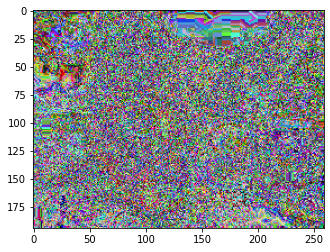

In [29]:
plt.imshow(garbageImage)
# We can see that the image when encrypted and then pixels being wrapped around using modulo 256 would lead to a garbage 
# image which is a bit similar to the pattern as we have take modulo in all the pixels with the same number

## Image after Decryption

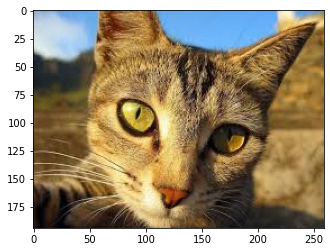

In [30]:
plt.imshow(finalImage)